In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# UniRef90

In [7]:
filepath = os.path.join(os.getcwd(), "..", "..", "..","input/data/uniref90/uniref90_final.csv")

In [8]:
df = pd.read_csv(filepath)

In [9]:
print("df size = ", df.shape)
n = df.shape[0]
df.head()

df size =  (19093, 8)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq
0,UniRef90_A0A023NJY4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MAARLCCQLDPARDVLCLRPVGAESRGRPLSGPLGTLSSPSLPAVP...
1,UniRef90_A0A023NLM3,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MGQNLSTSNPLGFFPDHQLDPAFRANSNNPDWDFNPNKDTWPDANK...
2,UniRef90_A0A023PGV5,1678143,69079,Paslahepevirus balayani,species,Bandicota bengalensis,species,SALANAVVVRPFLSRTQTEILIXLMXPRQLVFRPEVLWNHPIQRVI...
3,UniRef90_A0A023SEP0,10407,9606,Hepatitis B virus,species,Homo sapiens,species,NLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESRLV...
4,UniRef90_A0A023SEP4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,LVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESR...


In [5]:
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [10]:
df.head()

,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq
0,UniRef90_A0A023NJY4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MAARLCCQLDPARDVLCLRPVGAESRGRPLSGPLGTLSSPSLPAVP...
1,UniRef90_A0A023NLM3,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MGQNLSTSNPLGFFPDHQLDPAFRANSNNPDWDFNPNKDTWPDANK...
2,UniRef90_A0A023PGV5,1678143,69079,Paslahepevirus balayani,species,Bandicota bengalensis,species,SALANAVVVRPFLSRTQTEILIXLMXPRQLVFRPEVLWNHPIQRVI...
3,UniRef90_A0A023SEP0,10407,9606,Hepatitis B virus,species,Homo sapiens,species,NLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESRLV...
4,UniRef90_A0A023SEP4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,LVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESR...


min seq len = 11
max seq len = 6629


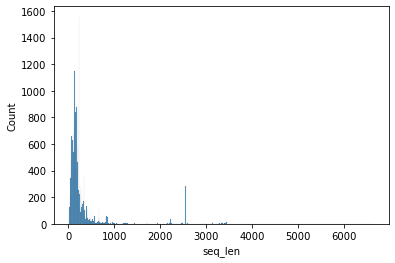

In [7]:
sns.histplot(df["seq_len"])
print(f"min seq len = {min(df['seq_len'])}")
print(f"max seq len = {max(df['seq_len'])}")
plt.show()

In [8]:
n_bins = 12
freq, bins = np.histogram(df["seq_len"], bins=n_bins)

In [9]:
hist_map = []
for i in range(n_bins):
    hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})

In [10]:
hist_df = pd.DataFrame(hist_map)

In [11]:
hist_df.head(20)

,start,end,count,percentage
0,11.0,562.5,17443,91.358089
1,562.5,1114.0,849,4.446656
2,1114.0,1665.5,111,0.581365
3,1665.5,2217.0,91,0.476614
4,2217.0,2768.5,399,2.089771
5,2768.5,3320.0,68,0.356151
6,3320.0,3871.5,128,0.670403
7,3871.5,4423.0,2,0.010475
8,4423.0,4974.5,1,0.005238
9,4974.5,5526.0,0,0.000000


### Sequences without virus host = Humans

In [11]:
print(df.shape)
df["virus_host_name"].value_counts()

(19093, 8)


Homo sapiens                   14816
Phacochoerus aethiopicus        1043
Bandicota bengalensis            798
Equus caballus                   439
Capra hircus                     425
Gallus gallus                    334
Apodemus sylvaticus              287
Bos taurus                       193
Sus scrofa                       122
Cynomys gunnisoni                 86
Connochaetes taurinus             58
Camelus dromedarius               35
Apodemus agrarius                 33
Elephas maximus                   29
Cynopterus brachyotis             28
Acrocephalus scirpaceus           27
Antilocapra americana             25
Epomops franqueti                 25
Ovis aries                        24
Felis catus                       22
Cervus elaphus                    18
Abrothrix longipilis              17
Macaca fascicularis               17
Cavia cutleri                     14
Meleagris gallopavo               13
Chodsigoa caovansunga             13
Mus musculus                      10
A

In [12]:
df["virus_host_name"].unique()

array(['Homo sapiens', 'Bandicota bengalensis', 'Apodemus agrarius',
       'Equus caballus', 'Capra hircus', 'Phacochoerus aethiopicus',
       'Gallus gallus', 'Felis catus', 'Odobenus rosmarus', 'Sus scrofa',
       'Bos taurus', 'Cynomys gunnisoni', 'Acrocephalus scirpaceus',
       'Camelus dromedarius', 'Apodemus sylvaticus',
       'Antilocapra americana', 'Ovis aries', 'Meleagris gallopavo',
       'Chodsigoa caovansunga', 'Cynopterus brachyotis',
       'Aotus trivirgatus', 'Nasua nasua', 'Rhinolophus sinicus',
       'Abrothrix longipilis', 'Chlorocebus pygerythrus',
       'Macaca fascicularis', 'Calomys callosus', 'Oecomys bicolor',
       'Nephelomys albigularis', 'Cavia cutleri', 'Turdus hortulorum',
       'Haemorhous mexicanus', 'Akodon azarae', 'Sturnira lilium',
       'Atelerix albiventris', 'Epomops franqueti',
       'Connochaetes taurinus', 'Callospermophilus lateralis',
       'Mus musculus', 'Ailuropoda melanoleuca', 'Rattus norvegicus',
       'Cercopithecus ha

In [13]:
df = df[df["virus_host_name"] != "Homo sapiens"]

In [14]:
print(df.shape)
df["virus_host_name"].unique()

(4277, 8)


array(['Bandicota bengalensis', 'Apodemus agrarius', 'Equus caballus',
       'Capra hircus', 'Phacochoerus aethiopicus', 'Gallus gallus',
       'Felis catus', 'Odobenus rosmarus', 'Sus scrofa', 'Bos taurus',
       'Cynomys gunnisoni', 'Acrocephalus scirpaceus',
       'Camelus dromedarius', 'Apodemus sylvaticus',
       'Antilocapra americana', 'Ovis aries', 'Meleagris gallopavo',
       'Chodsigoa caovansunga', 'Cynopterus brachyotis',
       'Aotus trivirgatus', 'Nasua nasua', 'Rhinolophus sinicus',
       'Abrothrix longipilis', 'Chlorocebus pygerythrus',
       'Macaca fascicularis', 'Calomys callosus', 'Oecomys bicolor',
       'Nephelomys albigularis', 'Cavia cutleri', 'Turdus hortulorum',
       'Haemorhous mexicanus', 'Akodon azarae', 'Sturnira lilium',
       'Atelerix albiventris', 'Epomops franqueti',
       'Connochaetes taurinus', 'Callospermophilus lateralis',
       'Mus musculus', 'Ailuropoda melanoleuca', 'Rattus norvegicus',
       'Cercopithecus hamlyni', 'Bos ind

In [15]:
df["virus_host_name"].value_counts()

Phacochoerus aethiopicus       1043
Bandicota bengalensis           798
Equus caballus                  439
Capra hircus                    425
Gallus gallus                   334
Apodemus sylvaticus             287
Bos taurus                      193
Sus scrofa                      122
Cynomys gunnisoni                86
Connochaetes taurinus            58
Camelus dromedarius              35
Apodemus agrarius                33
Elephas maximus                  29
Cynopterus brachyotis            28
Acrocephalus scirpaceus          27
Epomops franqueti                25
Antilocapra americana            25
Ovis aries                       24
Felis catus                      22
Cervus elaphus                   18
Abrothrix longipilis             17
Macaca fascicularis              17
Cavia cutleri                    14
Meleagris gallopavo              13
Chodsigoa caovansunga            13
Akodon azarae                    10
Atelerix albiventris             10
Mus musculus                

In [29]:
virus_host_names = ["Phacochoerus aethiopicus", "Bandicota bengalensis", "Equus caballus", "Capra hircus", "Gallus gallus", "Apodemus sylvaticus", "Bos taurus"]
df = df[df["virus_host_name"].isin(virus_host_names)]

In [16]:
print(df.shape)
df.to_csv(os.path.join(os.getcwd(), "..", "..", "..","input/data/uniref90/uniref90_final_without_humans.csv"), index=False)

(4277, 8)


### Sequences without single host only

In [14]:
df = df[df["seq_len"] <= 1114]
df = df.drop(columns=["seq_len"])

In [15]:
print(df.shape)
df.head()

(18292, 8)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq
0,UniRef90_A0A023NJY4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MAARLCCQLDPARDVLCLRPVGAESRGRPLSGPLGTLSSPSLPAVP...
1,UniRef90_A0A023NLM3,10407,9606,Hepatitis B virus,species,Homo sapiens,species,MGQNLSTSNPLGFFPDHQLDPAFRANSNNPDWDFNPNKDTWPDANK...
2,UniRef90_A0A023PGV5,1678143,69079,Paslahepevirus balayani,species,Bandicota bengalensis,species,SALANAVVVRPFLSRTQTEILIXLMXPRQLVFRPEVLWNHPIQRVI...
3,UniRef90_A0A023SEP0,10407,9606,Hepatitis B virus,species,Homo sapiens,species,NLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESRLV...
4,UniRef90_A0A023SEP4,10407,9606,Hepatitis B virus,species,Homo sapiens,species,LVNLLEDWGPCTEHGEHHIRIPRTPARVTGGVFLVDKNPHNTAESR...


In [16]:
df.to_csv(os.path.join(os.getcwd(), "..", "..", "..","input/data/uniref90/uniref90_final_msl1114.csv"), index=False)